# Suicide Rates Prediction

by Oohita Dasari, UIN: 01113995, Masters in Engineering Management

## Objective 

To create a model to predict the suicuide rate from the given data

Overview:
With increasing strive for globalization, risk assessment and corresponding preventative measures have become important factors. Predicting the suicide rates might help in developing suicide prediction measures for the corresponding countries.

Dataset: 

Link: https://www.kaggle.com/dbthapa/suicide-data-with-continent

The data set contains 12 attributes. It contains 27821 rows. The data is collected from countries all over
the world. There are attributes like suicide_no, gender, suicides per 100k population, generations etc.


Import the libraries that are required

In [49]:
#Importing the libraries that we are going to use while working on this project
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

<h1>Loading Dataset</h1>

In [50]:
#loading the dataset
data = pd.read_csv('master.csv')

In [51]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [52]:
#looking into the details or summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [53]:
data1=data

<h1>Data Wrangling</h1>

In [54]:
#handling missing values and maintaining consistency
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [55]:
data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [56]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [57]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [58]:
data['suicides_no'].unique()

array([  21,   16,   14, ..., 5503, 4359, 2872], dtype=int64)

In [59]:
data['population'].unique()

array([ 312900,  308000,  289700, ..., 2762158, 2631600, 1438935],
      dtype=int64)

In [60]:
data['suicides/100k pop'].unique()

array([ 6.71,  5.19,  4.83, ..., 47.86, 40.75, 26.61])

In [61]:
data['country-year'].unique()

array(['Albania1987', 'Albania1988', 'Albania1989', ..., 'Uzbekistan2012',
       'Uzbekistan2013', 'Uzbekistan2014'], dtype=object)

In [62]:
data['HDI for year'].unique()

array([  nan, 0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705,
       0.731, 0.762, 0.775, 0.811, 0.818, 0.831, 0.833, 0.836, 0.632,
       0.605, 0.648, 0.721, 0.723, 0.728, 0.733, 0.865, 0.882, 0.898,
       0.927, 0.93 , 0.932, 0.933, 0.935, 0.764, 0.794, 0.815, 0.853,
       0.879, 0.881, 0.884, 0.885, 0.609, 0.64 , 0.778, 0.78 , 0.774,
       0.786, 0.727, 0.816, 0.819, 0.817, 0.821, 0.824, 0.7  , 0.716,
       0.753, 0.765, 0.793, 0.785, 0.683, 0.796, 0.798, 0.806, 0.851,
       0.874, 0.866, 0.883, 0.886, 0.889, 0.888, 0.89 , 0.644, 0.664,
       0.701, 0.71 , 0.711, 0.715, 0.724, 0.576, 0.608, 0.702, 0.737,
       0.742, 0.746, 0.752, 0.755, 0.686, 0.696, 0.713, 0.749, 0.773,
       0.779, 0.782, 0.827, 0.849, 0.861, 0.867, 0.892, 0.903, 0.909,
       0.91 , 0.912, 0.654, 0.699, 0.788, 0.814, 0.83 , 0.832, 0.573,
       0.596, 0.629, 0.679, 0.706, 0.718, 0.72 , 0.623, 0.652, 0.682,
       0.704, 0.75 , 0.756, 0.761, 0.766, 0.807, 0.653, 0.685, 0.73 ,
       0.776, 0.772,

<h1>Data Manipulation</h1>

Converting "age" datatype from object to integer

In [63]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [64]:
#cols1 = list(df.columns)
data['age'] = [str(x)[:5] for x in data['age']]

In [65]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ y,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [66]:
data['age2'] = data['age'].str.extract('(\d+$)')


In [67]:
data['age2']=data['age2'].fillna(0).astype('int64')

In [68]:
data['age']=data['age'].str.extract('(\d+)').astype('int64')

In [69]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age2
0,Albania,1987,male,15,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,24
1,Albania,1987,male,35,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,54
2,Albania,1987,female,15,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,24
3,Albania,1987,male,75,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0
4,Albania,1987,male,25,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,34


In [70]:
data['country'].nunique()

101

In [71]:
data['age']=(data['age']+data['age2'])/2

In [72]:
data=data.drop(['age2','country-year'],axis=1)

In [88]:
data.head()

,year,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,19.5,21,312900,6.71,0.713,2156624900,796,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1987,44.5,16,308000,5.19,0.713,2156624900,796,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1987,19.5,14,289700,4.83,0.713,2156624900,796,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,37.5,1,21800,4.59,0.713,2156624900,796,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,29.5,9,274300,3.28,0.713,2156624900,796,0,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
data.dtypes

country                object
year                    int64
sex                    object
age                   float64
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Creating dummies for "country", "sex", "generation" attributes

In [74]:
data=pd.get_dummies(data=data,columns=['country','sex','generation'],drop_first=True)

In [86]:
data.head()

,year,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,19.5,21,312900,6.71,0.713,2156624900,796,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1987,44.5,16,308000,5.19,0.713,2156624900,796,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1987,19.5,14,289700,4.83,0.713,2156624900,796,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,37.5,1,21800,4.59,0.713,2156624900,796,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,29.5,9,274300,3.28,0.713,2156624900,796,0,0,...,0,0,0,0,1,0,0,0,0,0


Looking for null values and replace them 

In [112]:
#replace null values with the mode
temp = stats.mode(data['HDI for year'])
print(temp)

ModeResult(mode=array([0.713]), count=array([19540]))


In [75]:
data['HDI for year'] = data['HDI for year'].fillna(0.713)

ModeResult(mode=array([0.713]), count=array([84]))


Just making few changes to the attribute names

In [76]:
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',','')

In [77]:
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].astype('int64')

<h1>Exploratory Data Analysis (EDA)</h1>

Trying to see if there is any trend by plotting 10 countries that occur maximum bumber of times in the data

Text(0.5, 1.0, 'Top 10 Countries')

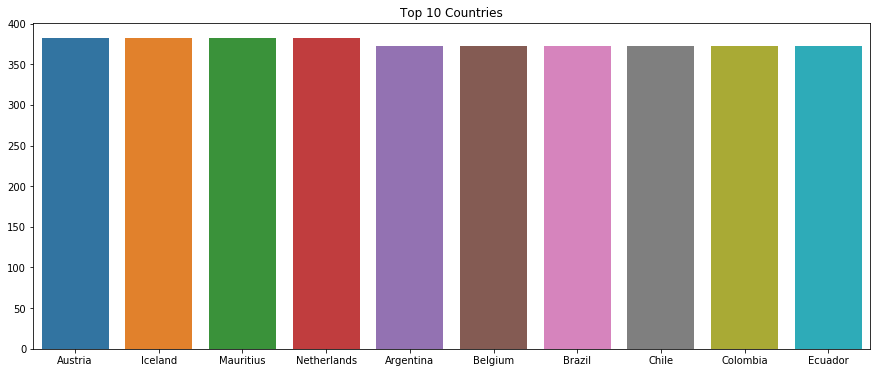

In [78]:
#top 10 countries
countries = Counter(data1['country'].tolist()).most_common(10)
country_idx = [country[0] for country in countries]
country_val = [country[1] for country in countries]
plt.subplots(figsize=(15,6))
sns.barplot(x = country_idx,y=country_val )
plt.title('Top 10 Countries')

Trying to see trends on least common countries that occur in the data

Text(0.5, 1.0, 'Bottom 10 Countries')

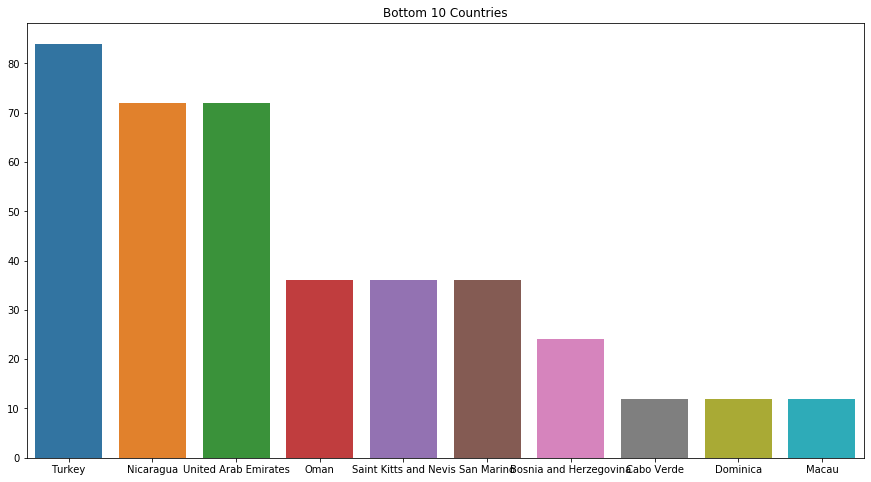

In [79]:
#least common 10 countries
countries2 = Counter(data1['country'].tolist()).most_common()[-11:-1]
country2_idx = [country[0] for country in countries2]
country2_val = [country[1] for country in countries2]
plt.subplots(figsize=(15,8))
sns.barplot(x = country2_idx,y=country2_val )
plt.title('Bottom 10 Countries')

Trying to see if there is any trend in number of suicides through the years

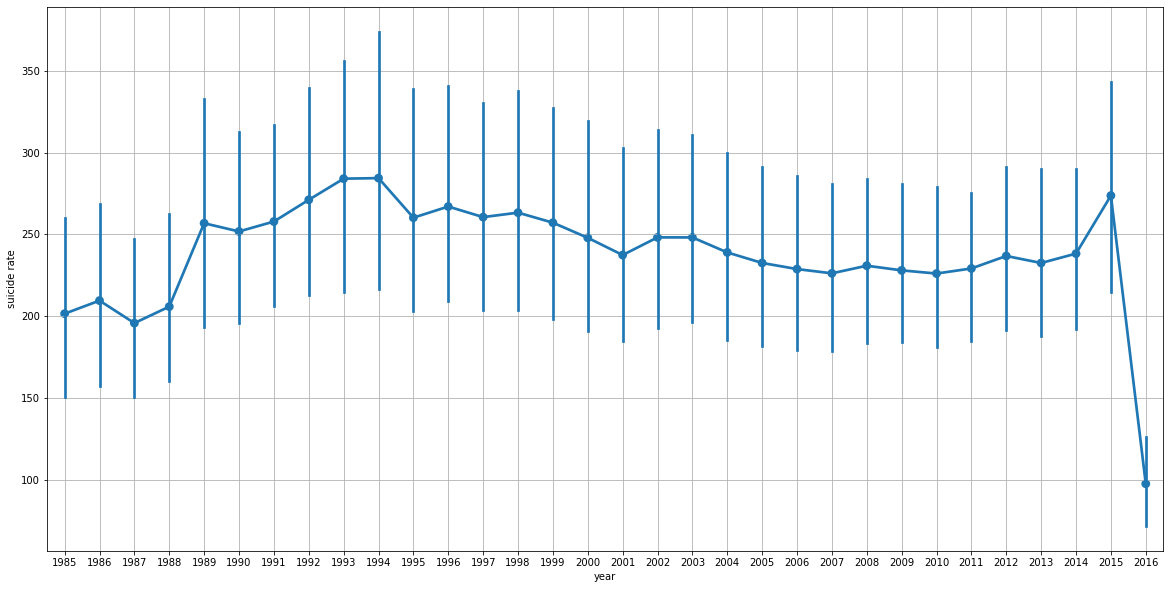

In [80]:
#year that had the most number of deaths
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='year',y='suicides_no',data=data1)
plt.xlabel('year')
plt.ylabel('suicide rate')
plt.grid()
#the steep decrease in the year 2016 could mean incomplete data. but there seems to be a rise between the years 1991-1994

the steep decrease in the year 2016 could mean incomplete data. but there seems to be a rise between the years 1991-1994

Looking for trend in number of times the each generation occurs in data

Text(0.5, 1.0, 'Generation Wise')

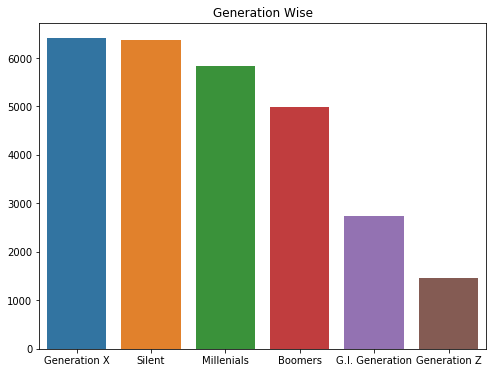

In [81]:
#generation wise
generations = Counter(data1['generation'].tolist()).most_common(6)
index = [generation[0] for generation in generations]
value = [generation[1] for generation in generations]
plt.subplots(figsize=(8,6))
sns.barplot(x = index,y = value)
plt.title('Generation Wise')
#the data is biased, there is not much insight after the Silent generation

Looking for correlation between the attributes

In [82]:
data1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age2
0,Albania,1987,male,19.5,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,24
1,Albania,1987,male,44.5,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,54
2,Albania,1987,female,19.5,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,24
3,Albania,1987,male,37.5,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0
4,Albania,1987,male,29.5,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,34


In [89]:
data1= data1.drop(['age2'],axis=1)

In [90]:
data1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,19.5,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,44.5,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,19.5,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,37.5,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,29.5,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [83]:
data1.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
age2                      5
dtype: int64

In [36]:
data1.dtypes

country                object
year                    int64
sex                    object
age                   float64
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
age2                    int64
dtype: object

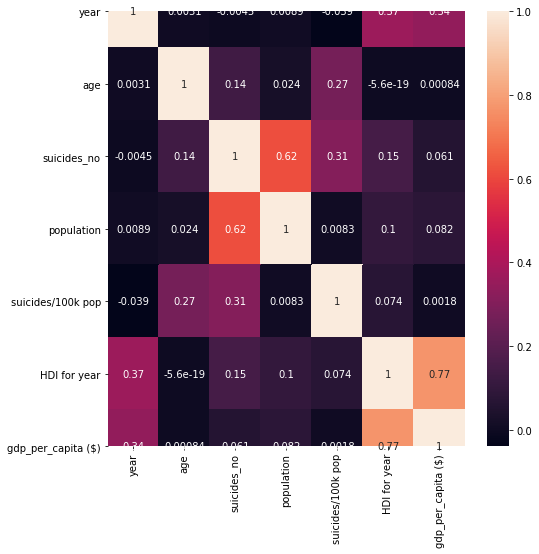

In [91]:
#Looking for Correlation 
plt.figure(figsize=(8,8))
sns.heatmap(data1.corr(),annot=True)

In [39]:
data.dtypes

year                            int64
age                           float64
suicides_no                     int64
population                      int64
suicides/100k pop             float64
                               ...   
generation_G.I. Generation      uint8
generation_Generation X         uint8
generation_Generation Z         uint8
generation_Millenials           uint8
generation_Silent               uint8
Length: 114, dtype: object

<h1>Linear Regression</h1>

In [40]:
#trying to predict suicides for 100k population
y = data.pop('suicides/100k pop')

In [41]:
X = data

Train_Test_data_Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
17437,0.10,7.060147
23991,13.92,35.353376
8337,2.54,4.900473
21661,0.00,8.287345
6235,0.00,5.794223
...,...,...
13883,57.68,40.921853
9008,12.91,21.933888
10798,0.29,-13.534929
25680,1.18,-8.685654


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,auc

In [47]:
mse,mae = mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

In [93]:
print(mse,mae)

170.7745984469816 8.48187551145905


In [96]:
#dropping few columns with less correlation
new_X = data.drop(['gdp_per_capita ($)'], axis = 1)

In [97]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size=0.3, random_state=42)

In [98]:
regressor.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
pred = regressor.predict(X1_test)

In [101]:
new_pred = pd.DataFrame({'Actual': y1_test, 'Predicted': pred})
new_pred

,Actual,Predicted
17437,0.10,0.099927
23991,13.92,13.920006
8337,2.54,2.539651
21661,0.00,0.000093
6235,0.00,-0.000038
...,...,...
13883,57.68,57.679894
9008,12.91,12.909681
10798,0.29,0.290286
25680,1.18,1.180004


In [105]:
mse,mae = mean_squared_error(y1_test,pred),mean_absolute_error(y1_test,pred)

In [106]:
print(mse,mae)

7.630451938148366e-08 0.00018951156176284626


By dropping one irrelevant attribute which has least correlation from the dada, the mean square error reduced from 170.774 to 7.6304

## References:

https://www.kaggle.com/dbthapa/suicide-data-with-continent

https://numpy.org/doc/

https://pandas.pydata.org/docs/pandas.pdf